## Ejercicio 3.25
*Kassimali, A. (2012). Matrix Analysis of Structures. 2nd Edition. Cengage Learning.*

![NON](img/ejercicio_3.25.png)

In [1]:
from PyStructMatrix import StructuralMatrixAnalysis, StructuralPlotter

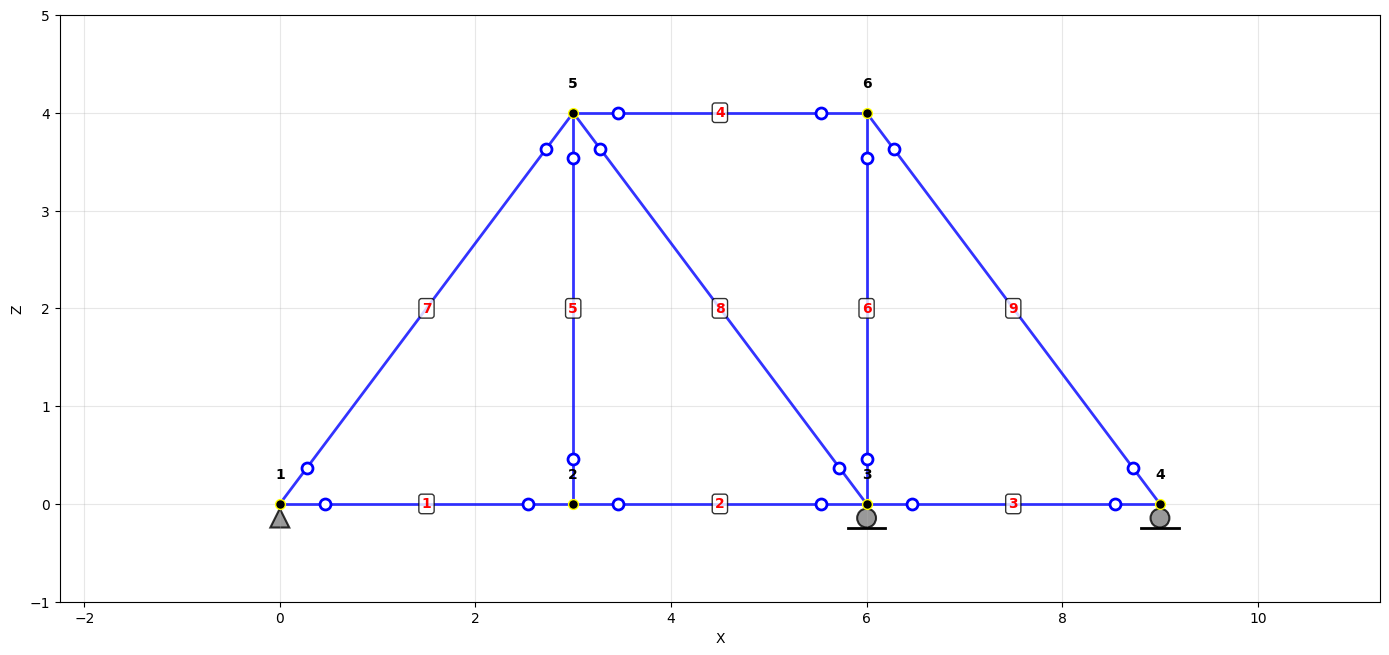

In [2]:
# Crear el sistema estructural
system = StructuralMatrixAnalysis()
plotter = StructuralPlotter(system)

# Definir propiedades del material y secciones
E = 200 * 10 ** 6
A = 3000 *10**-6
I = 1

# Definición de Nodos (Geometría)
system.defineNode(1, x=0, z=0)
system.defineNode(2, x=3, z=0)
system.defineNode(3, x=6, z=0)
system.defineNode(4, x=9, z=0)
system.defineNode(5, x=3, z=4)
system.defineNode(6, x=6, z=4)

# Asignación de Restricciones (Condiciones de Apoyo)
system.assignJoint.restrictions(1, ux=True, uz=True, ry=False)
system.assignJoint.restrictions(3, ux=False, uz=True, ry=False)
system.assignJoint.restrictions(4, ux=False, uz=True, ry=False)

# Definición de Elementos (Conectividad)
system.defineElement(1, 1, 2, A=A, E=E, I=I)
system.defineElement(2, 2, 3, A=A, E=E, I=I)
system.defineElement(3, 3, 4, A=A, E=E, I=I)
system.defineElement(4, 5, 6, A=A, E=E, I=I)
system.defineElement(5, 2, 5, A=A, E=E, I=I)
system.defineElement(6, 3, 6, A=A, E=E, I=I)
system.defineElement(7, 1, 5, A=A, E=E, I=I)
system.defineElement(8, 3, 5, A=A, E=E, I=I)
system.defineElement(9, 4, 6, A=A, E=E, I=I)

# Asignación de Cargas
system.assignJoint.force(2, fx=0, fz=-150, my=0)
system.assignJoint.force(5, fx=50, fz=0, my=0)
system.assignJoint.force(6, fx=0, fz=-150, my=0)

# Configuración de Liberaciones en Elementos
for i in system.Elements:
    system.assignElement.releases(i, start=True, end=True)

# Visualización Inicial
plotter.showFrame()

In [3]:
# Ejecución del Análisis Matricial
system.RunCompleteAnalysis(show_process=True)


--------------------------------------------------------------------------------
 1. INFORMACIÓN GENERAL
--------------------------------------------------------------------------------
Número de nodos: 6
Número de elementos: 9
Grados de libertad totales: 18
Grados de libertad restringidos (desplazamientos conocidos): 10 de 18
GL restringidos: [ 0  1  2  5  7  8 10 11 14 17]
Grados de libertad libres (fuerzas conocidas): 8 de 18
GL libres: [ 3  4  6  9 12 13 15 16]

--------------------------------------------------------------------------------
 2. MATRICES PARTICIONADAS
--------------------------------------------------------------------------------
KAA (8x8):
  |         3 |          4 |          6 |          9 |         12 |         13 |         15 |         16 |

  |     400000 |          0 |    -200000 |          0 |          0 |          0 |          0 |          0 |
  |          0 |     150000 |          0 |          0 |          0 |    -150000 |          0 |          0 |
  | 

In [4]:
# Obtención de Resultados Detallados de Elementos
system.getInfoElements()

ELEMENTO 1: [1, 2]  - Tipo 3
PROPIEDADES
  Longitud: 3.000
  Área (A): 3.0000e-03
  Módulo elástico (E): 2.0000e+08
  Momento de inercia (I): 1.0000e+00
  Liberaciones:  Nodo i = SÍ | Nodo j = SÍ
  Orientación: C=1.000 | S=0.000

CARGAS APLICADAS:
  No hay cargas aplicadas

MATRIZ DE TRANSFORMACIÓN T (6x6):
  |      1.000 |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |
  |     -0.000 |      1.000 |      0.000 |      0.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      1.000 |      0.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |      1.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |     -0.000 |      1.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |      1.000 |

MATRIZ DE RIGIDEZ LOCAL K (6x6):
  | 200000.000 |      0.000 |      0.000 | -200000.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |


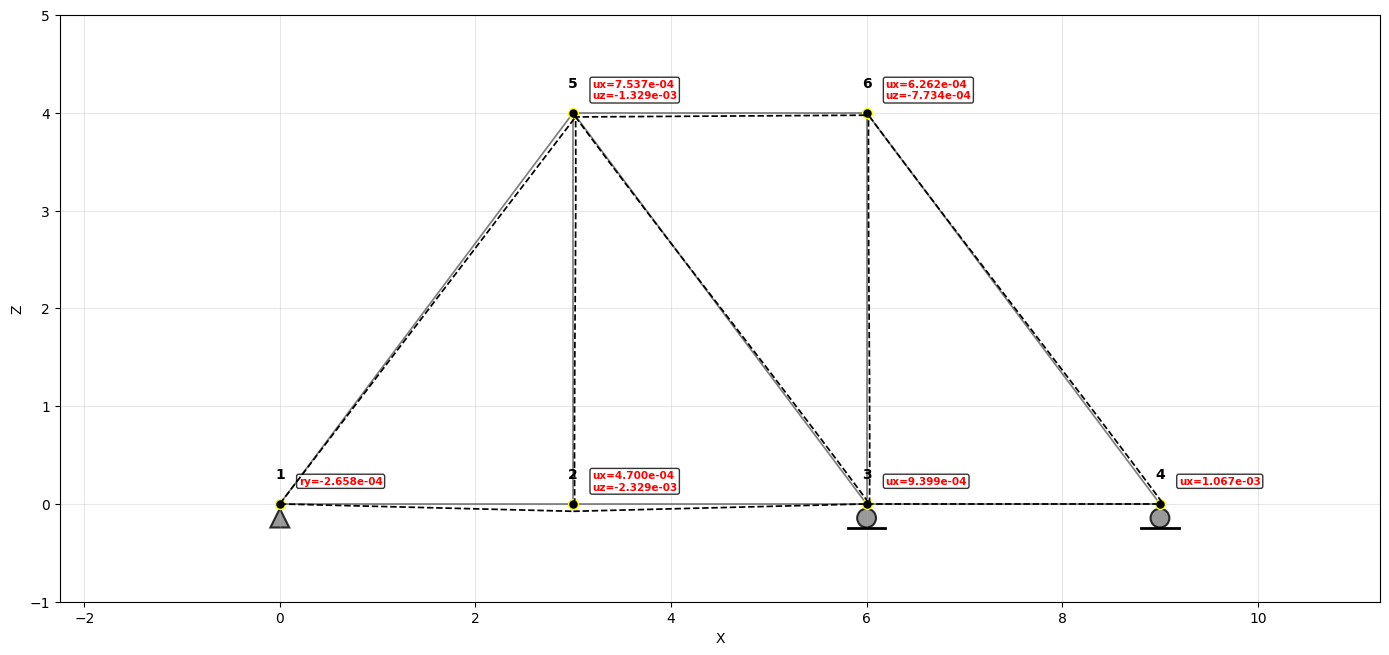

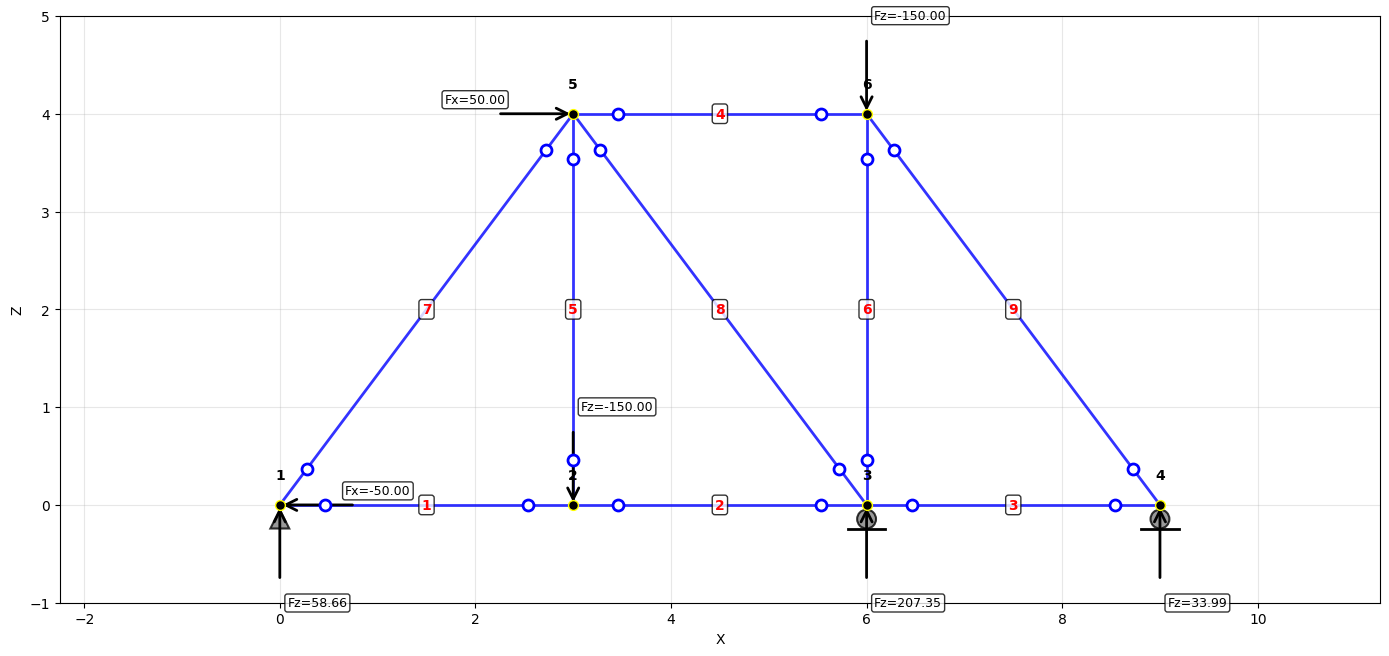

In [8]:
# Visualización de Resultados
plotter.showDeformedShape(escala=0.01)
plotter.showReactions()